In [43]:
import numpy as np
from itertools import islice
import statistics
import matplotlib.pyplot as plt

In [44]:
# data structure

# the data is stored in 2D array data[hlidx][rdidx]

# each graph is stored as 2D array at data[hlidx][rdidx]
# graph[stidx][wkidx]

hl = [14, 15, 16]
_hl = { 14: 0, 15: 1, 16: 2}

rd = [0, 2, 5]
_rd = { 0: 0, 2: 1, 5: 2}

st = ['big', 'rcu', 'callrcu']
_st = { 'big': 0, 'rcu': 1, 'callrcu': 2 }
stcolor = ['red', 'blue', 'green']

wk = [2, 6, 10]
_wk = { 2: 0, 6: 1, 10: 2 }

data = np.zeros((3,3,3,3))


In [45]:
# read from file
fname = 'result3.txt'

fh = open(fname, 'r')

while True:
    param = fh.readline()
    if not param:
        break
    ps = param.split()
    next6 = [float(x) for x in list(islice(fh, 6))]
    data[_hl[int(ps[2])]][_rd[int(ps[3])]][_st[ps[0]]][_wk[int(ps[1])]] = statistics.median(next6)

print(data)


[[[[6279.575  6722.71   6791.665 ]
   [2033.445  5236.5    6611.59  ]
   [6319.26   6537.065  6483.135 ]]

  [[ 901.0445  973.2545  974.1895]
   [1085.21   2924.08   4056.81  ]
   [1519.76   3883.51   4347.83  ]]

  [[ 414.323   417.241   427.35  ]
   [ 613.1395 1757.475  2577.595 ]
   [ 741.2935 2169.205  2398.095 ]]]


 [[[4819.53   5347.745  5181.905 ]
   [1921.245  5063.585  6270.145 ]
   [5115.125  6537.065  6578.95  ]]

  [[ 871.8565  877.193   900.974 ]
   [1044.935  2808.99   3952.63  ]
   [1481.565  3773.64   4065.04  ]]

  [[ 390.933   390.649   400.378 ]
   [ 603.1375 1748.595  2451.215 ]
   [ 691.5645 2066.255  2358.7   ]]]


 [[[2794.08   2785.54   2604.17  ]
   [1587.3    4444.535  5989.955 ]
   [3487.75   6140.745  5780.54  ]]

  [[ 769.588   775.345   778.816 ]
   [ 934.609  2591.3    3703.905 ]
   [1265.895  3144.78   3788.745 ]]

  [[ 363.9015  368.1955  379.939 ]
   [ 561.8005 1572.39   2273.475 ]
   [ 598.4045 1866.09   2212.56  ]]]]


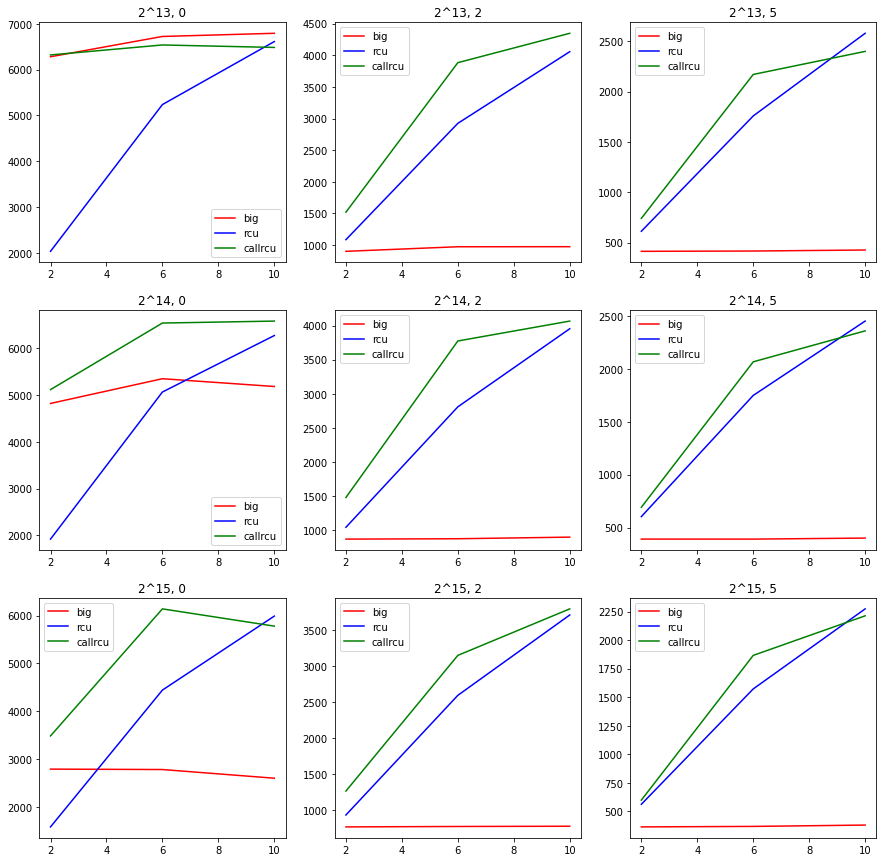

In [46]:
# draw the graphs

plt.rcParams["figure.figsize"] = (15,15)

fig, axs = plt.subplots(3, 3)

for hlidx in range(3):
    for rdidx in range(3):
        axs[hlidx][rdidx].set_title('2^{}, {}'.format(hl[hlidx]-1, rd[rdidx]))
        for stidx in range(3):
            axs[hlidx][rdidx].plot(wk, data[hlidx][rdidx][stidx], color=stcolor[stidx], label=st[stidx]);
        axs[hlidx][rdidx].legend()
            
